### Classification Error Metric Challenges

**Settings:  Where applicable, use test_size=0.30, random_state=4444.  This will permit comparison of results across users.

*These reference the Classification Challenges.*


#### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [157]:
congressional_data = pd.read_table('house-votes-84.data.txt',header=None,sep = ",")

In [158]:
congressional_data.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y


In [159]:
congressional_data.columns = ["Party", "Handicapped Infants Vote", "Water Project Cost Sharing Vote","Budget Resolution Adoption Vote",
                              "Physician Fee Freeze Vote","El Salvador Aid Vote","Religious Groups in Schools Vote",
                              "Anti Satellite Test Ban Vote", "Aid to Nicaraguan Contras Vote","MX Missile Vote",
                              "Immigration Vote","Synfuels Corporation Cutback Vote","Education Spending Vote",
                              "Superfund Right to Sue Vote","Crime Vote","Duty Free Exports Vote",
                              "Export Administration Act South Africa Vote"]

In [160]:
congressional_data = congressional_data.replace({"y":1,"n":0,"?":np.nan})
congressional_data = congressional_data.replace({'democrat':1,'republican':0})

In [161]:
congressional_data = congressional_data.fillna(congressional_data.mean())
congressional_data.head()

,Party,Handicapped Infants Vote,Water Project Cost Sharing Vote,Budget Resolution Adoption Vote,Physician Fee Freeze Vote,El Salvador Aid Vote,Religious Groups in Schools Vote,Anti Satellite Test Ban Vote,Aid to Nicaraguan Contras Vote,MX Missile Vote,Immigration Vote,Synfuels Corporation Cutback Vote,Education Spending Vote,Superfund Right to Sue Vote,Crime Vote,Duty Free Exports Vote,Export Administration Act South Africa Vote
0,0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,1,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,1,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,1,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [162]:
congressional_data.describe()

,Party,Handicapped Infants Vote,Water Project Cost Sharing Vote,Budget Resolution Adoption Vote,Physician Fee Freeze Vote,El Salvador Aid Vote,Religious Groups in Schools Vote,Anti Satellite Test Ban Vote,Aid to Nicaraguan Contras Vote,MX Missile Vote,Immigration Vote,Synfuels Corporation Cutback Vote,Education Spending Vote,Superfund Right to Sue Vote,Crime Vote,Duty Free Exports Vote,Export Administration Act South Africa Vote
count,435.000000,435.00000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.613793,0.44208,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.576190,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.487440,0.49030,0.472136,0.484876,0.487424,0.491847,0.474000,0.487920,0.486125,0.487752,0.496510,0.469464,0.476695,0.485886,0.482078,0.479083,0.340732
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.812689
50%,1.000000,0.00000,0.503876,1.000000,0.000000,0.504762,1.000000,1.000000,1.000000,0.501211,0.504673,0.000000,0.000000,0.509756,1.000000,0.000000,1.000000
75%,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [163]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [164]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

In [165]:
X = congressional_data.iloc[:,1:]
y = congressional_data.loc[:,"Party"]

In [166]:
#hold out 30% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444) 

In [167]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print('KNN validation metrics with 10 nearest neighbours: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, knn.predict(X_test)), 
         precision(actuals=y_test, preds=knn.predict(X_test)), 
         recall(actuals=y_test, preds=knn.predict(X_test)),
         F1(actuals=y_test, preds=knn.predict(X_test))
        )
     )

KNN validation metrics with 10 nearest neighbours: 
 Accuracy: 0.9160 
 Precision: 0.9342 
 Recall: 0.9221 
 F1: 0.9281


In [168]:
from sklearn.linear_model import LogisticRegression

#c parameter controls amount of regularization
lm = LogisticRegression(C=1000)
lm.fit(X_train,y_train)
print('Logistic regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, lm.predict(X_test)), 
         precision(actuals=y_test, preds=lm.predict(X_test)), 
         recall(actuals=y_test, preds=lm.predict(X_test)),
         F1(actuals=y_test, preds=lm.predict(X_test))
        )
     )

Logistic regression validation metrics: 
 Accuracy: 0.9313 
 Precision: 0.9250 
 Recall: 0.9610 
 F1: 0.9427


#### Challenge 2

For each, draw the ROC curve and calculate the AUC.

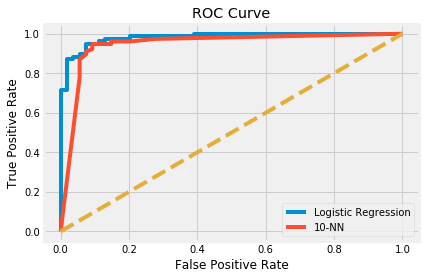

In [169]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, lm.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression','10-NN'])

#### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the `cross_val_score` function (like in Challenge 9).

In [170]:
from sklearn.cross_validation import cross_val_score

#knn
knn_cv = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print("accuracy: ",knn_cv.mean())
knn_cv = cross_val_score(knn,X_train,y_train,cv=5,scoring='precision')
print("precision: ",knn_cv.mean())
knn_cv = cross_val_score(knn,X_train,y_train,cv=5,scoring='recall')
print("recall: ",knn_cv.mean())
knn_cv = cross_val_score(knn,X_train,y_train,cv=5,scoring='f1')
print("F1: ",knn_cv.mean())

accuracy:  0.9260293969596296
precision:  0.9772334834834835
recall:  0.9
F1:  0.9364101244101244


In [171]:
#logistic regression
lm_cv = cross_val_score(lm, X, y, cv=10, scoring='accuracy')
print("accuracy: ",lm_cv.mean())
lm_cv = cross_val_score(lm,X_train,y_train,cv=5,scoring='precision')
print("precision: ",lm_cv.mean())
lm_cv = cross_val_score(lm,X_train,y_train,cv=5,scoring='recall')
print("recall: ",lm_cv.mean())
lm_cv = cross_val_score(lm,X_train,y_train,cv=5,scoring='f1')
print("F1: ",lm_cv.mean())

accuracy:  0.9560656397865699
precision:  0.9683991683991684
recall:  0.9421052631578947
F1:  0.9547938089307951


#### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [172]:
movies_df = pd.read_csv('/Users/ariannabreslauer/Documents/dataScience/metis/bootcamp/nyc18_ds17/challenges/challenges_data/2013_movies.csv')

In [173]:
movies_df = movies_df.dropna()

In [175]:
movies_df = movies_df.replace({'R':3,'PG-13':2,'PG':1,"G":0})

In [176]:
X = movies_df[['Budget','DomesticTotalGross','Runtime']]
y = movies_df['Rating']

In [177]:
movies_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,2,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,2,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,1,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,1,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,2,143,2013-06-14 00:00:00


In [178]:
#hold out 30% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444) 

In [181]:
#logistic regression
lm = LogisticRegression(C=100000)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print('Logistic regression validation metrics: \n Precision: %.4f \n Recall: %.4f' %
        (precision(actuals=y_test, preds=lm.predict(X_test)), 
         recall(actuals=y_test, preds=lm.predict(X_test))
        )
     )

Logistic regression validation metrics: 
 Precision: nan 
 Recall: nan


/Users/ariannabreslauer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/ariannabreslauer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


In [182]:
#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('KNN with 10 neighbours validation metrics: \n Precision: %.4f \n Recall: %.4f' %
        (precision(actuals=y_test, preds=knn.predict(X_test)), 
         recall(actuals=y_test, preds=knn.predict(X_test))
        )
     )

KNN with 10 neighbours validation metrics: 
 Precision: nan 
 Recall: nan


/Users/ariannabreslauer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/Users/ariannabreslauer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


#### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [183]:
breast_cancer_data_df = pd.read_csv("/Users/ariannabreslauer/Documents/dataScience/metis/bootcamp/nyc18_ds17/challenges/challenges_data/haberman.data",header=None)
breast_cancer_data_df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [184]:
breast_cancer_data_df = breast_cancer_data_df.rename({0:'age',1:'surgery_year',2:'nodes',3:'survival_status'},axis=1)

In [185]:
breast_cancer_data_df["survival_status"] = breast_cancer_data_df["survival_status"].apply(lambda x: x-1)

In [186]:
breast_cancer_data_df.head()

,age,surgery_year,nodes,survival_status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


In [187]:
X = breast_cancer_data_df[["age","surgery_year","nodes"]]
y = breast_cancer_data_df["survival_status"]

In [188]:
#hold out 25% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444) 

In [192]:
lm = LogisticRegression(C=100000)
lm.fit(X_train,y_train)
y_pred_lm = lm.predict(X_test)
lm_score = round(accuracy_score(y_test, y_pred_lm),4)
print(lm_score)

0.837


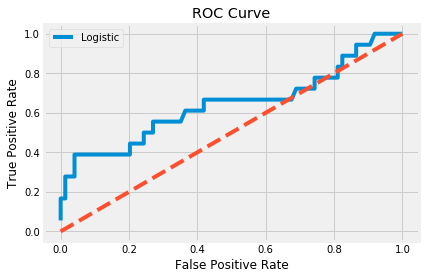

In [191]:
fpr, tpr, _ = roc_curve(y_test, lm.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic'])